# Usage of the sentinelhub API to access copernicus dataspace


In [1]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
from sentinelhub import (
    CRS,
    BBox,
    SHConfig,
    DataCollection,
    MimeType,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
    WmsRequest,
    MosaickingOrder
)

## Credentials

Credentials for Sentinel Hub services (client_id & client_secret) can be obtained in your Dashboard. In the User Settings you can create a new OAuth Client to generate these credentials. For more detailed instructions, visit the relevant documentation page.

Now that you have your client_id & client_secret, it is recommended to configure a new profile in your Sentinel Hub Python package. Instructions on how to configure your Sentinel Hub Python package can be found here. Using these instructions you can create a profile specific to using the package for accessing Copernicus Data Space Ecosystem data collections. This is useful as changes to the the config class are usually only temporary in your notebook and by saving the configuration to your profile you won’t need to generate new credentials or overwrite/change the default profile each time you rerun or write a new Jupyter Notebook.

If you are a first time user of the Sentinel Hub Python package for Copernicus Data Space Ecosystem, you should create a profile specific to the Copernicus Data Space Ecosystem. You can do this in the following cell:

In [2]:
#### Only run this cell if you have not created a configuration.
# config = SHConfig()
# config.sh_client_id = getpass.getpass("Enter your SentinelHub client id")
# config.sh_client_secret = getpass.getpass("Enter your SentinelHub client secret")
# config.sh_token_url = "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token"
# config.sh_base_url = "https://sh.dataspace.copernicus.eu"
# config.save("cdse")

# If you have a profile in ~/.config/sentinelhub, you can just pass the profile name.
config = SHConfig("profile_name")

## Data of the Maschsee

In [3]:
maschsee_coords_wgs84 = (9.733200, 52.342366, 9.755344, 52.363231)
resolution = 10
maschsee_bbox = BBox(bbox=maschsee_coords_wgs84, crs=CRS.WGS84)
maschsee_size = bbox_to_dimensions(maschsee_bbox, resolution=resolution)

Get a time span of the last two months discretized in 5 day steps.

In [4]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=60)
tdelta_in_days = datetime.timedelta(days=1)
n_chunks = int((end - start) / tdelta_in_days)
edges = [(start + i * tdelta_in_days).date().isoformat() for i in range(n_chunks)]
slots = [(edges[i], edges[i + 1]) for i in range(len(edges) - 1)]

print("5-day time windows:\n")
for slot in slots:
    print(slot)

5-day time windows:

('2024-04-07', '2024-04-08')
('2024-04-08', '2024-04-09')
('2024-04-09', '2024-04-10')
('2024-04-10', '2024-04-11')
('2024-04-11', '2024-04-12')
('2024-04-12', '2024-04-13')
('2024-04-13', '2024-04-14')
('2024-04-14', '2024-04-15')
('2024-04-15', '2024-04-16')
('2024-04-16', '2024-04-17')
('2024-04-17', '2024-04-18')
('2024-04-18', '2024-04-19')
('2024-04-19', '2024-04-20')
('2024-04-20', '2024-04-21')
('2024-04-21', '2024-04-22')
('2024-04-22', '2024-04-23')
('2024-04-23', '2024-04-24')
('2024-04-24', '2024-04-25')
('2024-04-25', '2024-04-26')
('2024-04-26', '2024-04-27')
('2024-04-27', '2024-04-28')
('2024-04-28', '2024-04-29')
('2024-04-29', '2024-04-30')
('2024-04-30', '2024-05-01')
('2024-05-01', '2024-05-02')
('2024-05-02', '2024-05-03')
('2024-05-03', '2024-05-04')
('2024-05-04', '2024-05-05')
('2024-05-05', '2024-05-06')
('2024-05-06', '2024-05-07')
('2024-05-07', '2024-05-08')
('2024-05-08', '2024-05-09')
('2024-05-09', '2024-05-10')
('2024-05-10', '2024-0

## Requesting data for each chunk

In [16]:
evalscript_true_color = """
    //VERSION=3

    function setup() {
        return {
            input: [{
                bands: ["B02", "B03", "B04"]
            }],
            output: {
                bands: 3
            }
        };
    }

    function evaluatePixel(sample) {
        return [sample.B04, sample.B03, sample.B02];
    }
"""
max_cloud_coverage = 0.15


def get_sentinel_request(time_interval, evalscript=evalscript_true_color, save_dir=None):
    return SentinelHubRequest(
        evalscript=evalscript,
        data_folder=save_dir,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L2A,
                time_interval=time_interval,
                mosaicking_order=MosaickingOrder.LEAST_CC,
                maxcc=max_cloud_coverage
            )
        ],
        responses=[SentinelHubRequest.output_response("default", MimeType.TIFF)],
        bbox=maschsee_bbox,  #
        size=maschsee_size,  # size of the output image we want to retrieve
        config=config,  # configuration defined at the top (Sentinel Hub credentials)
    )

In [6]:
COPERNICUS_API_URL = "https://sh.dataspace.copernicus.eu/api/v1/process"
# create a list of requests
list_of_requests = [get_sentinel_request(slot) for slot in slots]
list_of_requests = [request.download_list[0] for request in list_of_requests]
for dl_item in list_of_requests:
    dl_item.url = COPERNICUS_API_URL

# download data with multiple threads
data = SentinelHubDownloadClient(config=config).download(
    list_of_requests, max_threads=5
)

max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 159	min 2
max 159	min 2
max 0	min 0
max 0	min 0
max 0	min 0
max 155	min 3
max 155	min 3
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0
max 0	min 0


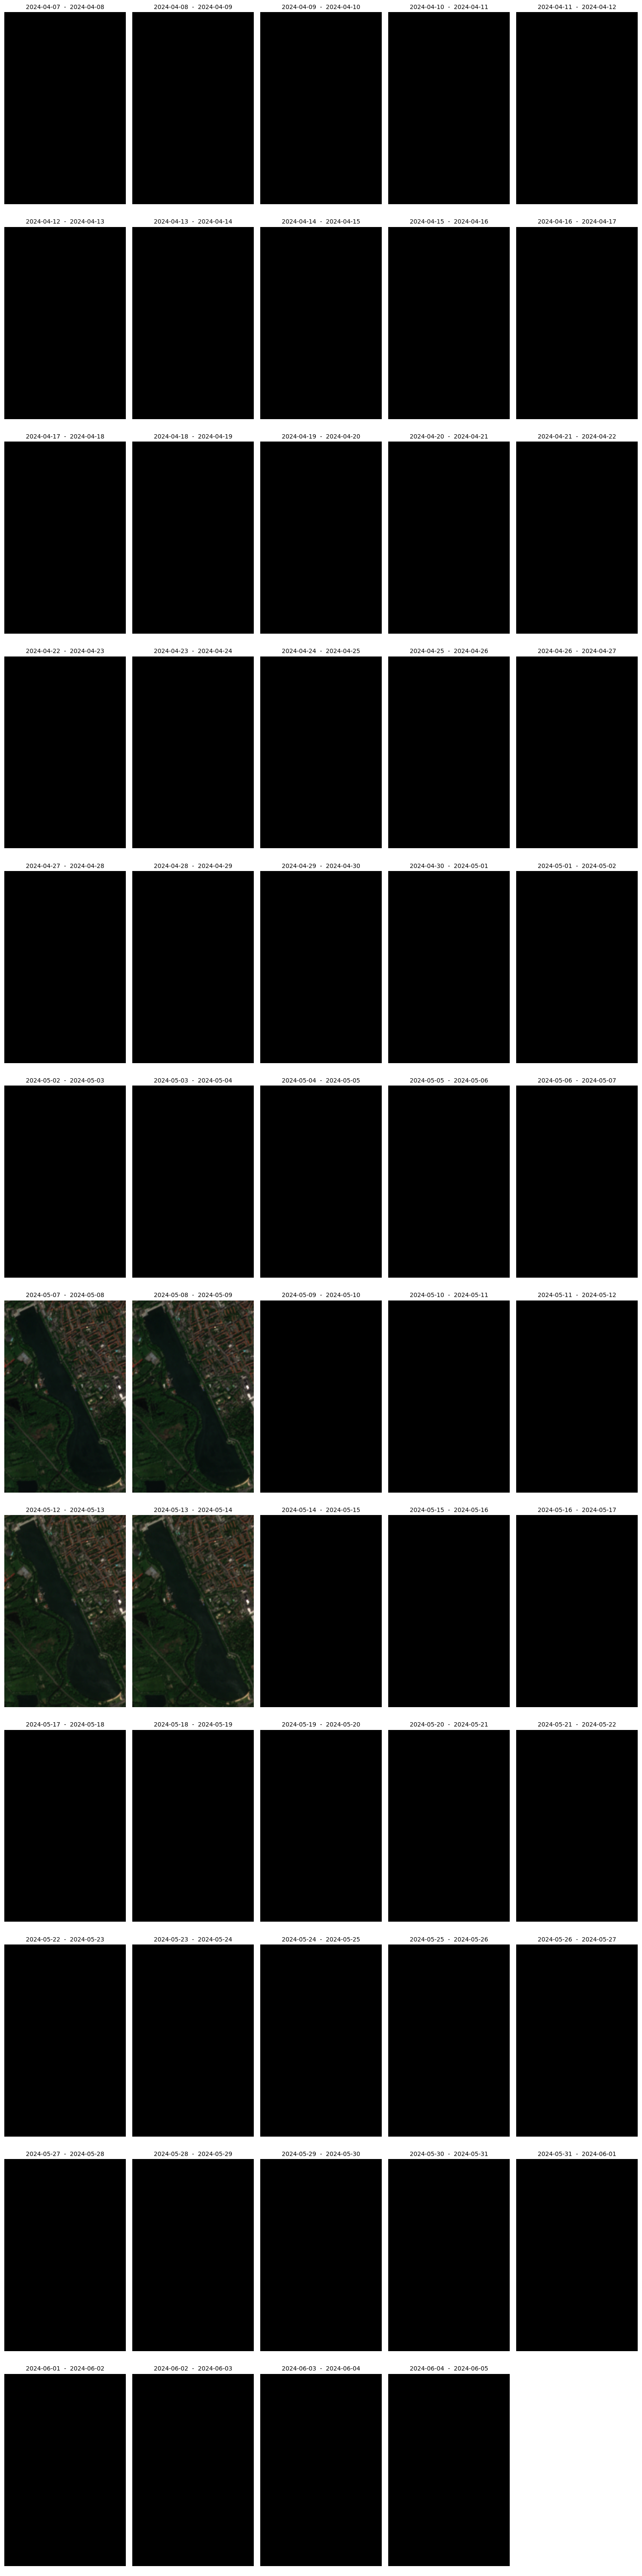

In [7]:
ncols = 5
nrows = int(len(slots) / 5) + 1
aspect_ratio = 1.5
subplot_kw = { "xticks": [], "yticks": [], "frame_on": False }

fig, axs = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(2 * ncols * aspect_ratio, 5 * nrows),
    subplot_kw=subplot_kw,
)
axs = axs[:]
for idx, image in enumerate(data):
    ax = axs[idx // ncols][idx % ncols]
    print(f'max {np.max(image)}\tmin {np.min(image)}')
    ax.imshow(np.clip(image * 2.5 / 255, 0, 1))
    ax.set_title(f"{slots[idx][0]}  -  {slots[idx][1]}", fontsize=10)

plt.tight_layout()

# Create a WMS request with Sentinelhub API to get 
With the Process API we can only ever download one image at a time. So our goal is to first get a list of all dates for which there is an image of the Maschsee available within our desired timeframe. Afterwards we can use these dates to send one request for each date and download the images automatically, one by one.First, we use a WmsRequest with the get_dates() method. This will not request any images, but only a list of the dates and times at which an image of the region, defined in the bounding box, was taken.For that we first need to define an instance_id for the SHConfig. To retrieve it, go the the Configuration Utility on the dashboard of your account on the Sentinel Hub Website. You can then use the Simple WMS Template. If it is not there yet, create it by clicking on New Configuration and select it under Select from existing instances. Afterwards, it should be there in the Configuration Utility. 

Also, make sure that you access the correct layer in your utility configurator and that this layer matches the data-collection.

In [8]:
time_frame = (start, end)
wms_ndvi_request_with_deltat = WmsRequest(
    data_collection=DataCollection.SENTINEL2_L2A,
    layer="NDVI_GRAYSCALE_SENTINEL-2-L2A",
    bbox=maschsee_bbox,
    time=time_frame,
    width=maschsee_size[0],
    image_format=MimeType.TIFF,
    time_difference=datetime.timedelta(hours=2),
    config=config,
)
wms_ndvi_request_with_dates = wms_ndvi_request_with_deltat.get_dates()
print(f'Number of images available: {len(wms_ndvi_request_with_dates)}')
for dt in wms_ndvi_request_with_dates[:5]:
    print(f'{dt.date()}T00:00:00+01:00', f'{dt.date()}T23:59:59+01:00')

slots = [(f'{dt.date()}T00:00:00+01:00', f'{dt.date()}T23:59:59+01:00') for dt in wms_ndvi_request_with_dates]

Number of images available: 12
2024-04-08T00:00:00+01:00 2024-04-08T23:59:59+01:00
2024-04-13T00:00:00+01:00 2024-04-13T23:59:59+01:00
2024-04-18T00:00:00+01:00 2024-04-18T23:59:59+01:00
2024-04-23T00:00:00+01:00 2024-04-23T23:59:59+01:00
2024-04-28T00:00:00+01:00 2024-04-28T23:59:59+01:00


Once we have the dates, download everything.

In [17]:
evalscript_ndvi = """//VERSION=3

let viz = new HighlightCompressVisualizerSingle();

function evaluatePixel(samples) {
    let val = index(samples.B08, samples.B04);
    val = viz.process(val);
    val.push(samples.dataMask);
    return val;
}

function setup() {
  return {
    input: [{
      bands: [
        "B04",
        "B08",
        "dataMask"
      ]
    }],
    output: {
      bands: 2
    }
  }
}"""

save_dir = './test/'

list_of_requests = [get_sentinel_request(slot, evalscript=evalscript_ndvi, save_dir=save_dir) for slot in slots]
list_of_requests = [request.download_list[0] for request in list_of_requests]
for dl_item in list_of_requests:
    dl_item.url = COPERNICUS_API_URL

# download data with multiple threads
data = SentinelHubDownloadClient(config=config, ).download(
    list_of_requests, max_threads=5
)
data = [d for d in data if np.max(d) - np.min(d) > 0.0]  # remove data with no information (basically cloudy data)

save the images to hard drive

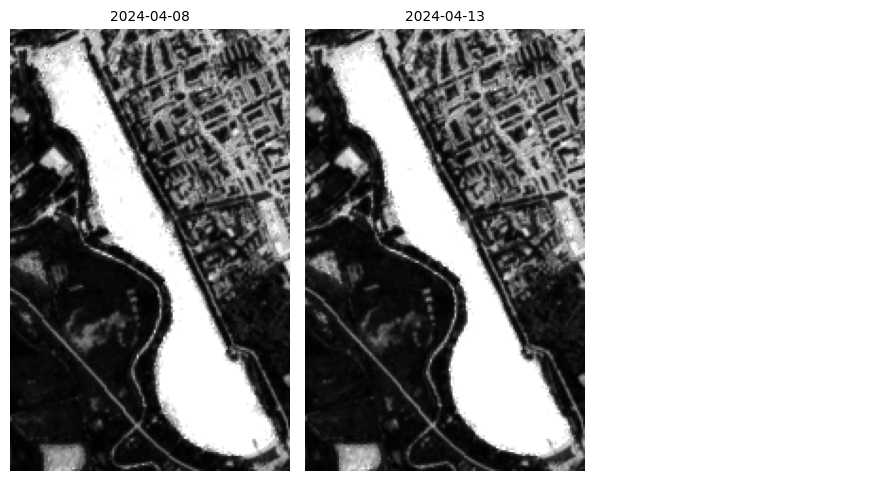

In [18]:
ncols = 3
nrows = 1 if ncols >= len(data) else int(len(data) / ncols)
aspect_ratio = 1.5
subplot_kw = { "xticks": [], "yticks": [], "frame_on": False }

fig, axs = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(2 * ncols * aspect_ratio, 5 * nrows),
    subplot_kw=subplot_kw,
)

for idx, image in enumerate(data):
    image = image / 255.0
    image = (image[:, :, 1] - image[:, :, 0]) / (image[:, :, 0] + image[:, :, 1])
    ax = axs[idx // ncols][idx % ncols] if nrows > 1 else axs[idx]
    ax.imshow(np.clip(image, 0, 1), cmap='gray')
    ax.set_title(f"{slots[idx][0].split('T')[0]}", fontsize=10)

plt.tight_layout()

### Download the Aquatic Plants and Algae Custom Script Detector
https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/apa_script/

In [82]:
evalscript_ndvi = """//VERSION=3
//indices to apply a mask to water bodies

let moisture = (B8A-B11)/(B8A+B11); 
let NDWI = (B03 - B08)/(B03 + B08);
let water_bodies = (NDWI-moisture)/(NDWI+moisture);
//indices to identify water plants and algae

let water_plants = (B05 - B04)/(B05 + B04);
let NIR2 = B04 + (B11 - B04)*((832,8 - 664,6)/(1613,7 - 664,6));
let FAI = B08 - NIR2;
//indices to apply a mask over clouds

//code taken from sentinel-2 custom scripts cby_cloud_detection by Peter Fogh

let bRatio = (B03 - 0.175) / (0.39 - 0.175);
let NDGR = index(B03, B04);
let gain = 2.5;
// natural color composition

let natural_color = [3*B04, 3*B03, 3*B02];
// cloud mask

function clip(a) {
 return Math.max(0, Math.min(1, a));
}

if (B11 > 0.1){
  if (bRatio > 1) { //cloud

     var v = 0.5*(bRatio - 1);
     return natural_color;
  }
  else if (bRatio > 0 && NDGR>0) { //cloud

     var v = 5 * Math.sqrt(bRatio * NDGR);
     return natural_color;
  }
}
//classify the presence of algae and water plants over water surfaces

if (NDWI < 0 && water_bodies > 0) return natural_color;
else return [FAI*8.5, water_plants*5.5, NDWI*1];
"""

save_dir = './test_ndvi/'

list_of_requests = [get_sentinel_request(slot, evalscript=evalscript_ndvi, save_dir=save_dir) for slot in slots]
list_of_requests = [request.download_list[0] for request in list_of_requests]
for dl_item in list_of_requests:
    dl_item.url = COPERNICUS_API_URL

# download data with multiple threads
data = SentinelHubDownloadClient(config=config, ).download(
    list_of_requests, max_threads=5
)
data = [d for d in data if np.max(d) - np.min(d) > 0.0]

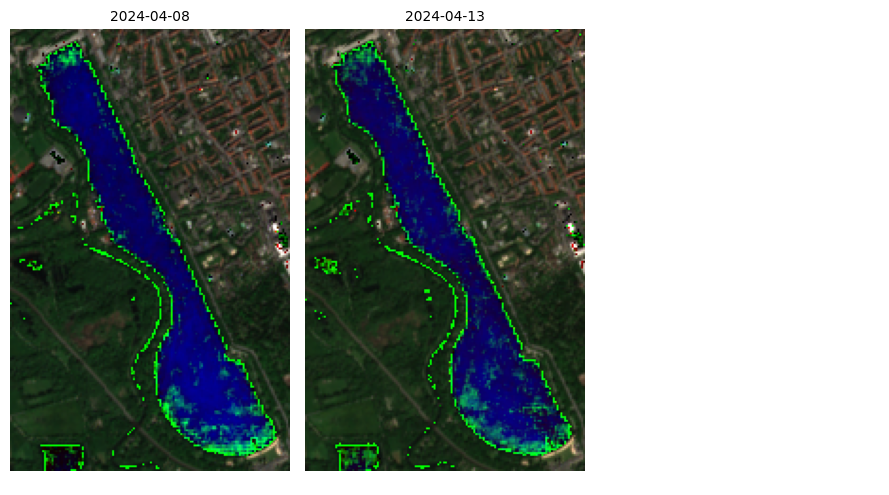

In [85]:
ncols = 3
nrows = 1 if ncols >= len(data) else int(len(data) / ncols)
aspect_ratio = 1.5
subplot_kw = { "xticks": [], "yticks": [], "frame_on": False }

fig, axs = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(2 * ncols * aspect_ratio, 5 * nrows),
    subplot_kw=subplot_kw,
)

for idx, image in enumerate(data):
    ax = axs[idx // ncols][idx % ncols] if nrows > 1 else axs[idx]
    ax.imshow(image)
    ax.set_title(f"{slots[idx][0].split('T')[0]}", fontsize=10)

plt.tight_layout()

# Crop image to Polygon
## First for the two-banded data

In [19]:
import glob
from pathlib import Path

src_no_data = 0
dst_no_data = 0
maschsee_shp = '../assets/shapefiles/vector/00_NI_maschsee_shapefile/00_NI_maschsee_shapefile.shp'
input_img_paths = glob.iglob('./test/*/*.tiff')
for img_path in input_img_paths:
    img_path = Path(img_path)
    img_id = Path(img_path).parent.name
    img_out_path = Path('./test/cropped/') / (str(img_id) + '.tiff')
    command = f"gdalwarp -dstnodata NoData -cutline {maschsee_shp} {img_path} {img_out_path}"
    os.system(command)

Warning 1: test/d1e85422dc098685096d7e5c8b38f6bb/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/91bc69dd50260e0591c122ff5011caad/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Creating output file that is 202P x 190L.
Processing test/d1e85422dc098685096d7e5c8b38f6bb/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 202P x 190L.
Processing test/91bc69dd50260e0591c122ff5011caad/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/00e6f4a8ee4b439b21cd2e99dc67ddf7/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


Creating output file that is 202P x 190L.
Processing test/00e6f4a8ee4b439b21cd2e99dc67ddf7/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 202P x 190L.
Processing test/308e17f7823d4ce665b6a89839329d9e/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: test/308e17f7823d4ce665b6a89839329d9e/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/be28d693eaf309fd0de9d4123697dfab/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/3cdfbccbaae4b670232e30087d0a7276/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSampl

Creating output file that is 202P x 190L.
Processing test/be28d693eaf309fd0de9d4123697dfab/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 202P x 190L.
Processing test/3cdfbccbaae4b670232e30087d0a7276/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 202P x 190L.
Processing test/eb3d720a05d41e235f13ecde4d346215/response.tiff [1/1] : 0

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/eb3d720a05d41e235f13ecde4d346215/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/4a9407a9a4959f7fa034e5a2369ee882/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 202P x 190L.
Processing test/4a9407a9a4959f7fa034e5a2369ee882/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 202P x 190L.
Processing test/cropped/eb3d720a05d41e235f13ecde4d346215.tiff [1/1] : 0Using internal nodata values (e.g. 0) for image test/cropped/eb3d720a05d41e235f13ecde4d346215.tiff.
...10...20...30...40...50...60...70...80...90...

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


100 - done.
Processing test/cropped/3cdfbccbaae4b670232e30087d0a7276.tiff [1/1] : 0Using internal nodata values (e.g. 0) for image test/cropped/3cdfbccbaae4b670232e30087d0a7276.tiff.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing test/cropped/be28d693eaf309fd0de9d4123697dfab.tiff [1/1] : 0Using internal nodata values (e.g. 0) for image test/cropped/be28d693eaf309fd0de9d4123697dfab.tiff.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing test/cropped/4a9407a9a4959f7fa034e5a2369ee882.tiff [1/1] : 0Using internal nodata values (e.g. 0) for image test/cropped/4a9407a9a4959f7fa034e5a2369ee882.tiff.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing test/cropped/308e17f7823d4ce665b6a89839329d9e.tiff [1/1] : 0Using internal nodata values (e.g. 0) for image test/cropped/308e17f7823d4ce665b6a89839329d9e.tiff.
...10...20...30...40...50...60...70...80...90...100 - done.
Processing test/cropped/00e6f4a8ee4b439b21cd2e99dc67ddf7.tiff [1

Warning 1: test/8a14d5f30b4ff5403f32584c17ff42e5/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/993c23ee7d2043a489e7f99e7a61c420/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: test/b0bc8215a5c8b8aa05fdaadc3feb8db5/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSampl

Creating output file that is 202P x 190L.
Processing test/b0bc8215a5c8b8aa05fdaadc3feb8db5/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 202P x 190L.
Processing test/6a106e0414a5b8ae8c60947becdc8d32/response.tiff [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.


Warning 1: test/6a106e0414a5b8ae8c60947becdc8d32/response.tiff: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.
Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


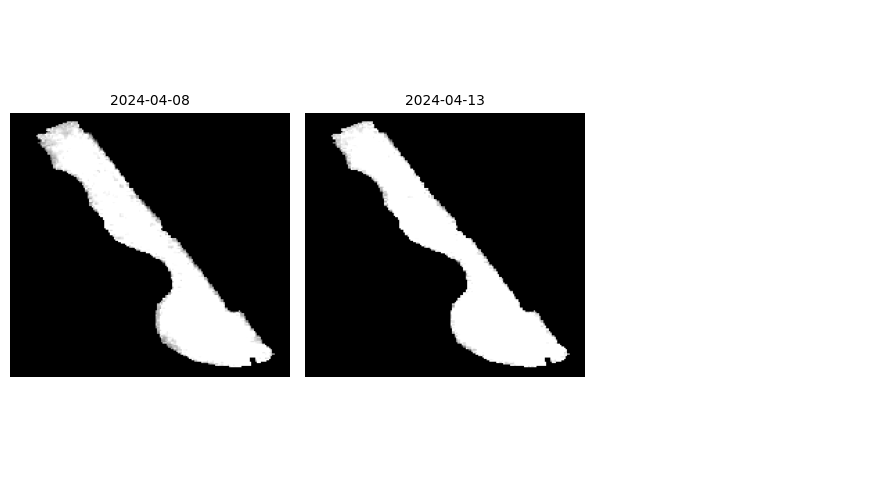

In [55]:
import rasterio

cropped_tif_paths = glob.iglob('./test/cropped/*.tiff')
new_data = [rasterio.open(img) for img in cropped_tif_paths]
new_data = [d for d in new_data if np.any(d.read(1))]  # filter non-zero data

ndvi = lambda d: np.round((d.read(2) / 255.0 - d.read(1) / 255.0) / (d.read(2) / 255.0 + d.read(1) / 255.0 + 1e-10), 5)

ndvis = [ndvi(d) for d in new_data]

ncols = 3
nrows = 1 if ncols >= len(ndvis) else int(len(ndvis) / ncols)
aspect_ratio = 1.5
subplot_kw = { "xticks": [], "yticks": [], "frame_on": False }

fig, axs = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(2 * ncols * aspect_ratio, 5 * nrows),
    subplot_kw=subplot_kw,
)

for idx, image in enumerate(ndvis):
    ax = axs[idx // ncols][idx % ncols] if nrows > 1 else axs[idx]
    ax.imshow(np.clip(image, 0, 1), cmap='gray')
    ax.set_title(f"{slots[idx][0].split('T')[0]}", fontsize=10)

plt.tight_layout()

## Crop the images


In [86]:
src_no_data = 0
dst_no_data = 0
maschsee_shp = '../assets/shapefiles/vector/00_NI_maschsee_shapefile/00_NI_maschsee_shapefile.shp'
input_img_paths = glob.iglob('./test_ndvi/[!cropped]*/*.tiff')
for img_path in input_img_paths:
    img_path = Path(img_path)
    img_id = Path(img_path).parent.name
    # todo: add the date to the new file-name by reading from request.json
    img_out_path = Path('./test_ndvi/cropped/') / (str(img_id) + '.tiff')
    command = f"gdalwarp -dstnodata NoData -cutline {maschsee_shp} {img_path} {img_out_path}"
    _ = os.system(command + "> /dev/null 2>&1")

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 202, 'height': 190, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00010988840964818032, 0.0, 9.7332,
       0.0, -0.00010988840964818032, 52.363231)}
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 202, 'height': 190, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00010988840964818032, 0.0, 9.7332,
       0.0, -0.00010988840964818032, 52.363231)}


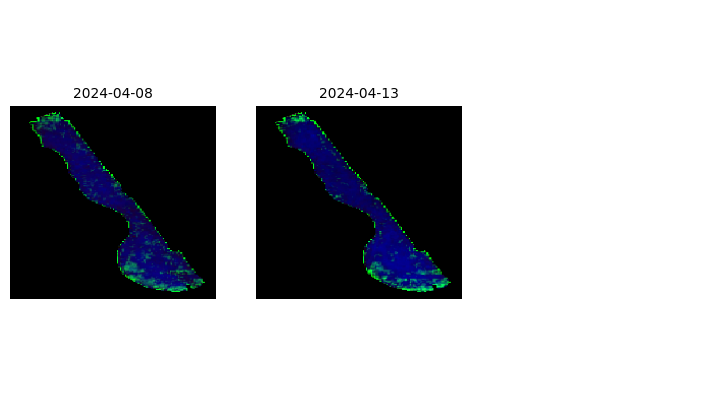

In [96]:
cropped_tif_paths = glob.iglob('./test_ndvi/cropped/*.tiff')
new_data = [rasterio.open(img) for img in cropped_tif_paths]
new_data = [d for d in new_data if np.any(d.read(1))]  # filter non-zero data

ncols = 3
nrows = 1 if ncols >= len(new_data) else int(len(new_data) / ncols)
aspect_ratio = 1.5
subplot_kw = { "xticks": [], "yticks": [], "frame_on": False }

fig, axs = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    figsize=(2 * ncols * aspect_ratio, 5 * nrows),
    subplot_kw=subplot_kw,
)

for idx, image in enumerate(new_data):
    print(image.meta)
    ax = axs[idx // ncols][idx % ncols] if nrows > 1 else axs[idx]
    ax.imshow(np.moveaxis(image.read(), 0, 2))
    ax.set_title(f"{slots[idx][0].split('T')[0]}", fontsize=10)

## Cluster the colors of the APA to distinguish between algae water and black
https://www.kaggle.com/code/abrahamanderson/image-segmentation-with-k-means-clustering

In [ ]:
!pip install opencv-python-headless==4.7.0.72

In [104]:
import cv2

img = np.moveaxis(new_data[0].read(), 0, 2)
#Converts the HxWx3 image into a Kx3 matrix where K=HxW and each row is now a vector in the 3-D space of RGB.
vectorized_img = img.reshape((-1, 3))

#We convert the unit8 values to float as it is a requirement of the k-means method of OpenCV.
vectorized_img = np.float32(vectorized_img)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

K = 4
attempts = 10
ret, label, center = cv2.kmeans(vectorized_img, K, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

center = np.uint8(center)
center



array([[  0,   0,   0],
       [ 12,   5,  90],
       [ 10,  88,  80],
       [  2, 223,  41]], dtype=uint8)

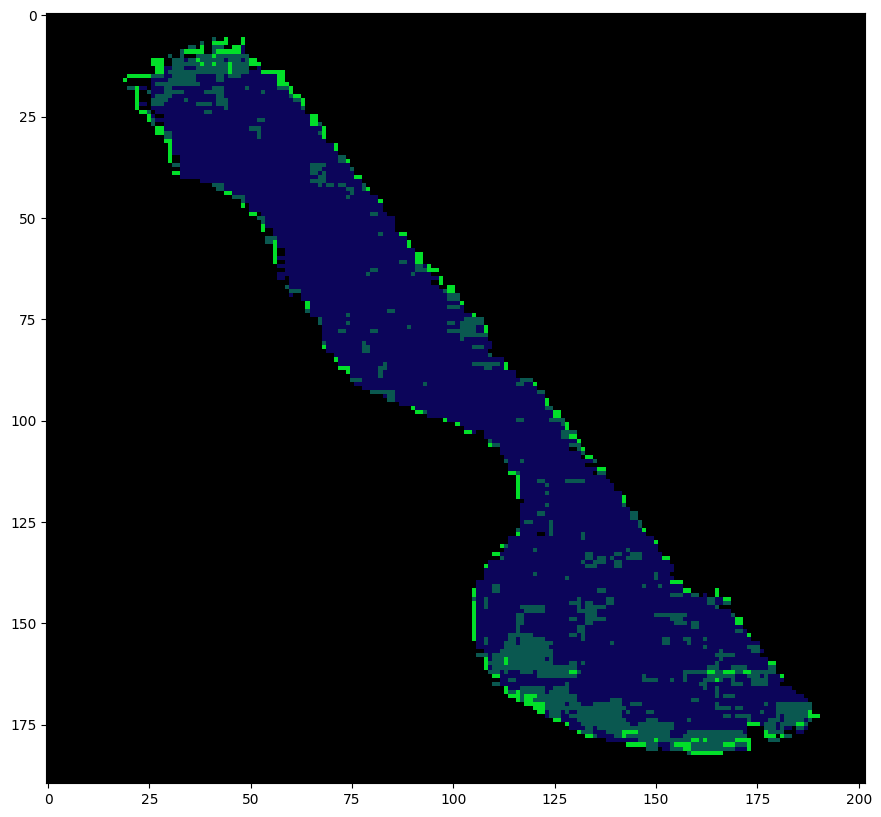

In [105]:
#Next, we have to access the labels to regenerate the clustered image
res = center[label.flatten()]
result_image = res.reshape((img.shape))

plt.figure(figsize=(15, 10))
plt.imshow(result_image)



In [107]:
band1 = new_data[0].read(1)
print('Band1 has shape', band1.shape)
height = band1.shape[0]
width = band1.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(new_data[0].transform, rows, cols)
lons = np.array(xs)
lats = np.array(ys)
print('lons shape', lons.shape)

Band1 has shape (190, 202)
lons shape (190, 202)


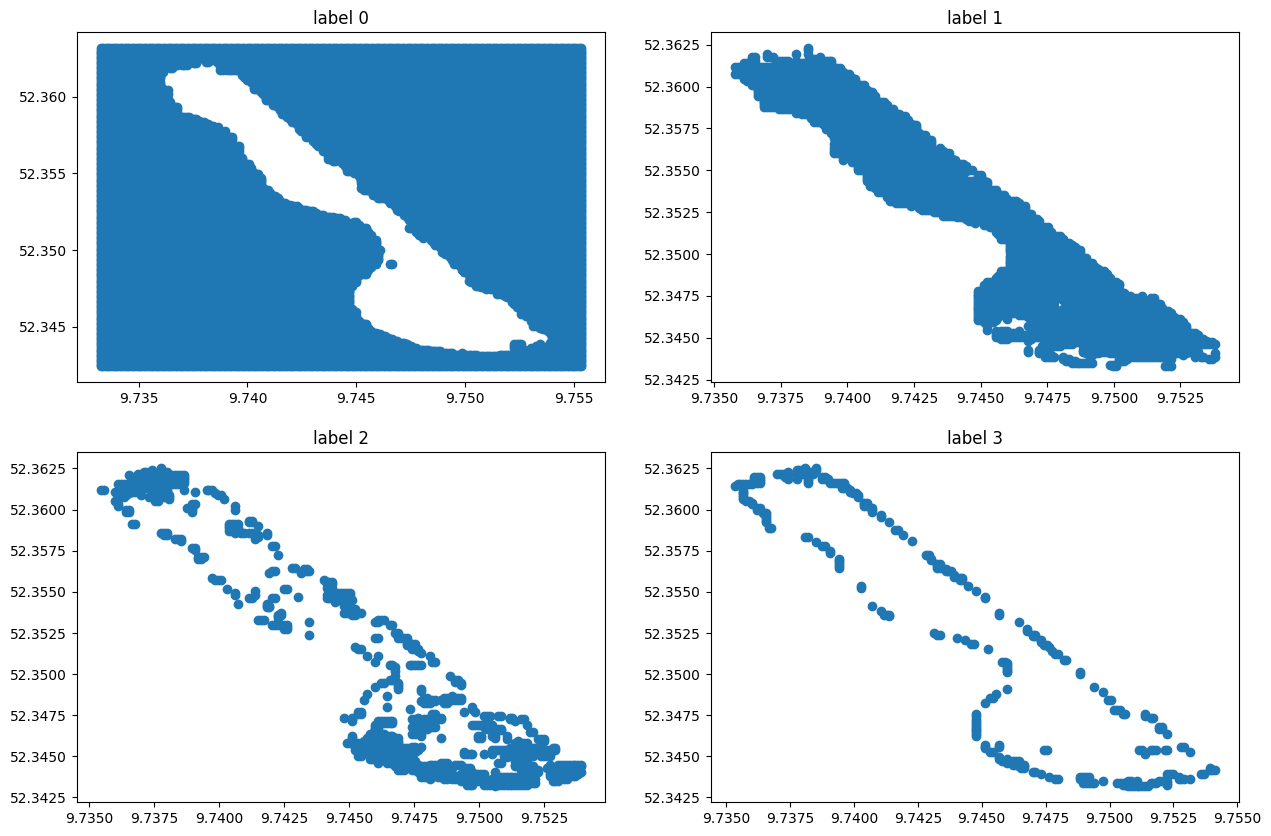

In [179]:
gps = np.array(list(zip(lons.ravel(), lats.ravel())))
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.ravel()
for l in range(4):
    positions = gps[np.argwhere(label == l)[:, 0]]
    ax[l].scatter(positions[:, 0], positions[:, 1])
    ax[l].set_title(f'label {l}')

## Cluster the identified points of interest into areas of interest
Instead of checking more than 100 points of interest, we'd like to cluster these points into regions. 
Therefore, we're using KMeans again. The problem is to find the right number of clusters. 
### The elbow method

Text(0.5, 1.0, 'Elbow Method For Optimal k')

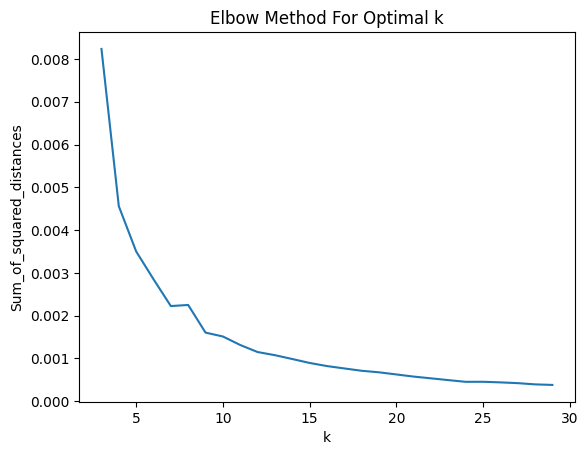

In [205]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
n_clusters = range(3, 30)
for k in n_clusters:
    km = KMeans(n_clusters=k).fit(positions)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(n_clusters, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
#     
# n_clusters = 20
# positions = gps[np.argwhere(label == 2)[:, 0]]
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(positions)

### The silhoutte-method
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

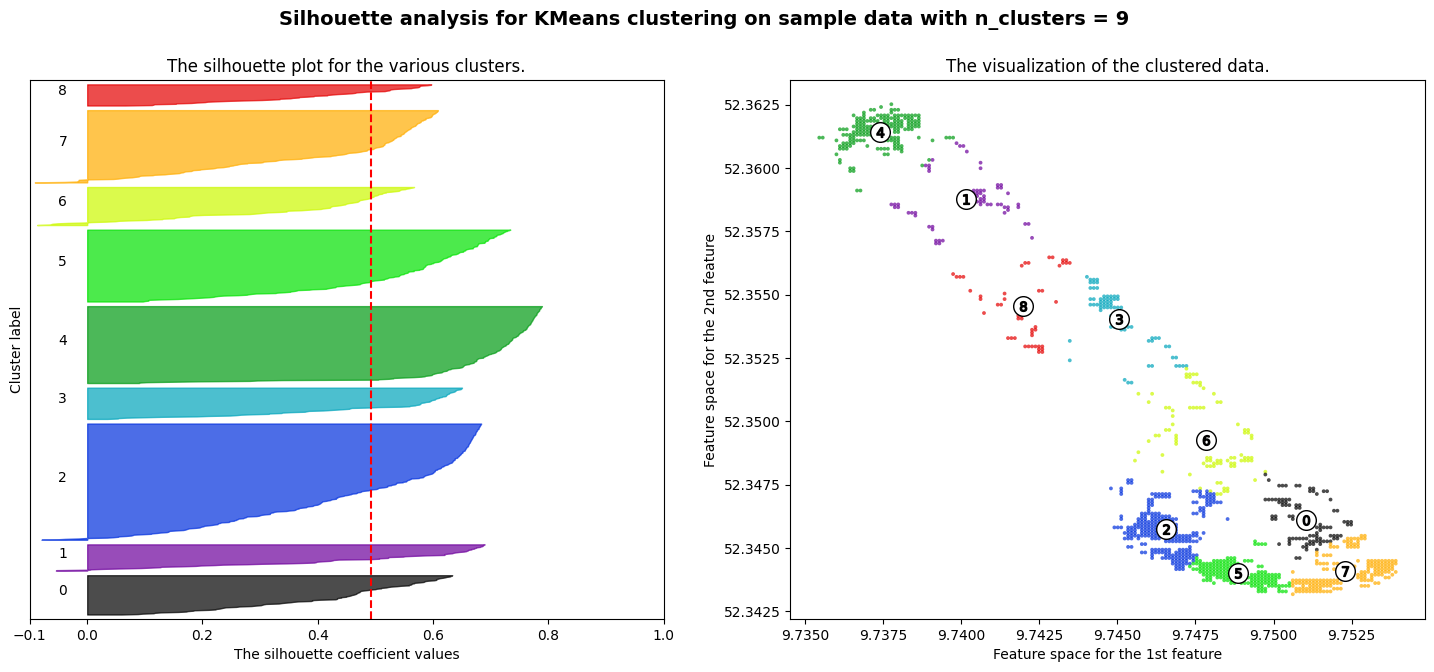

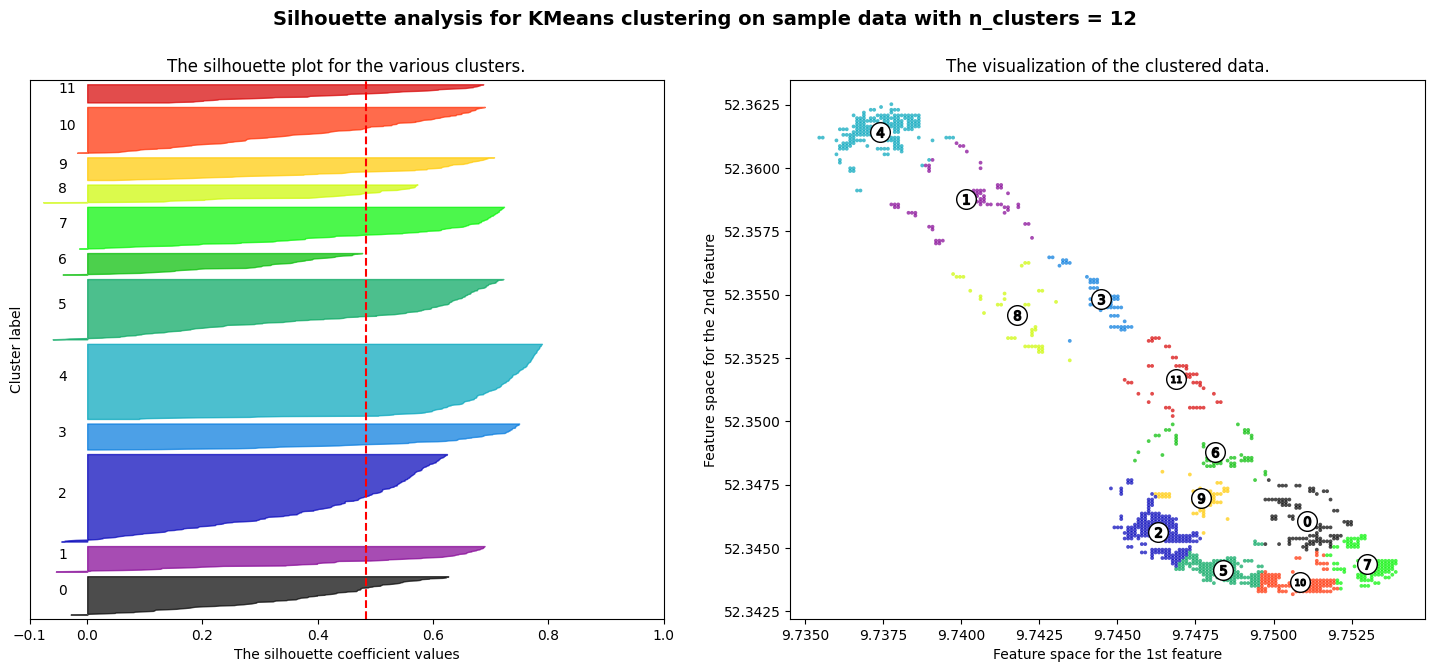

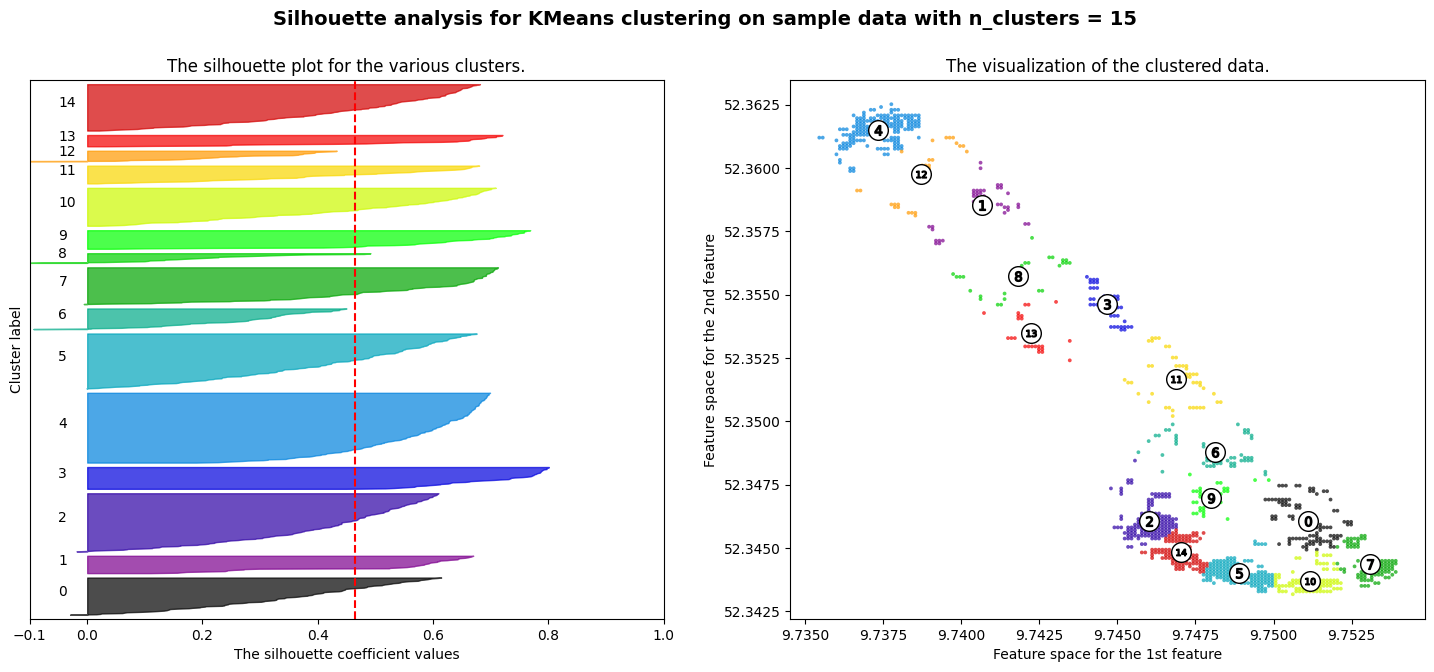

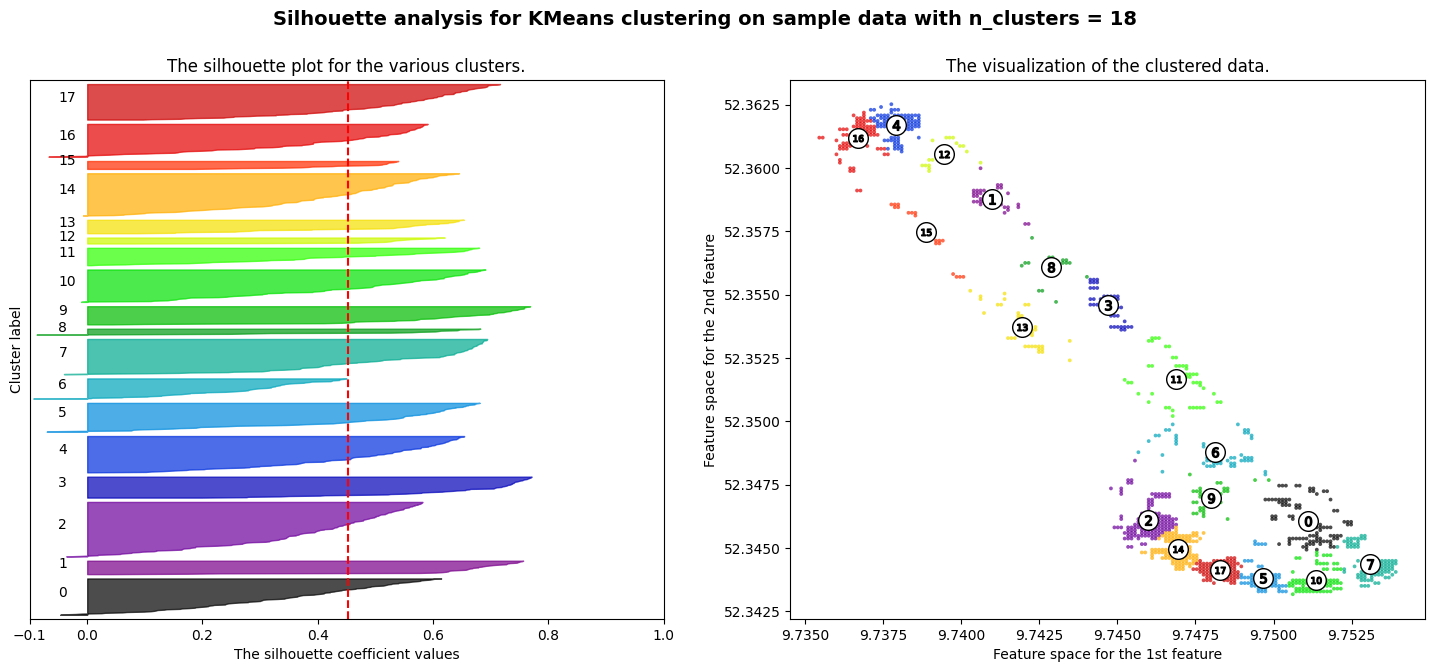

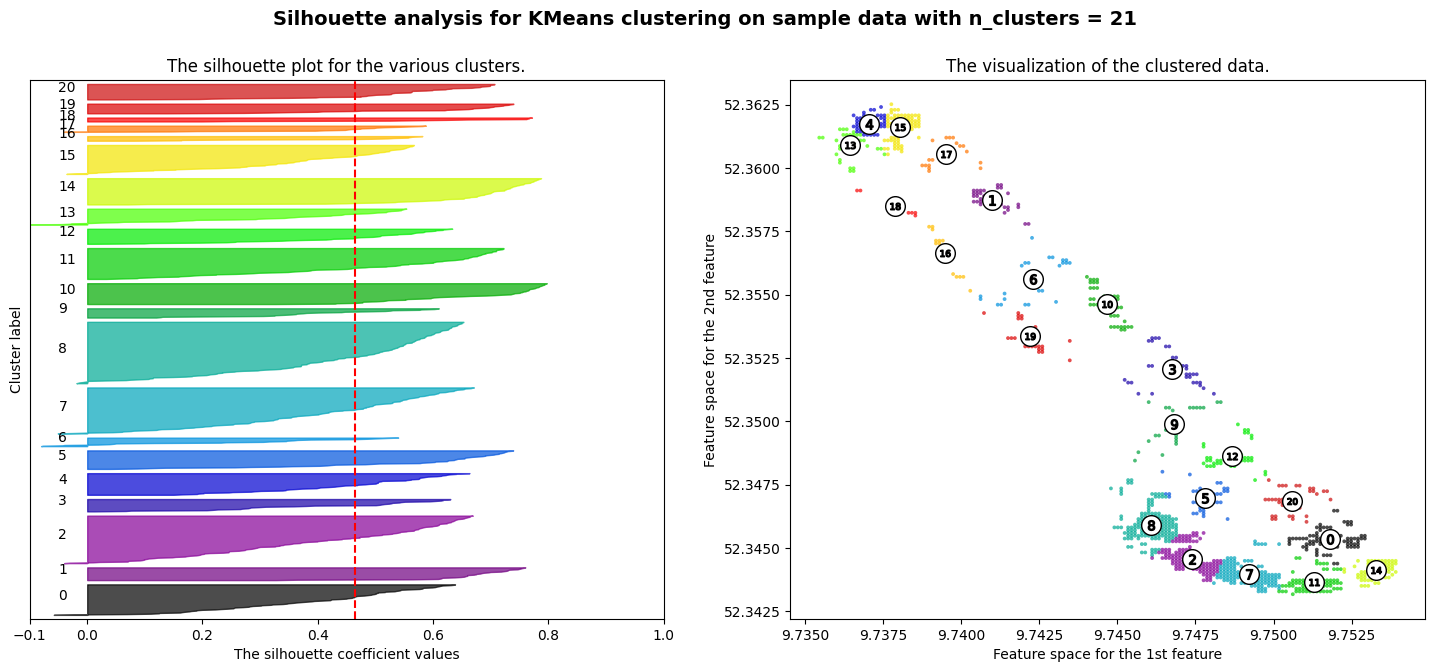

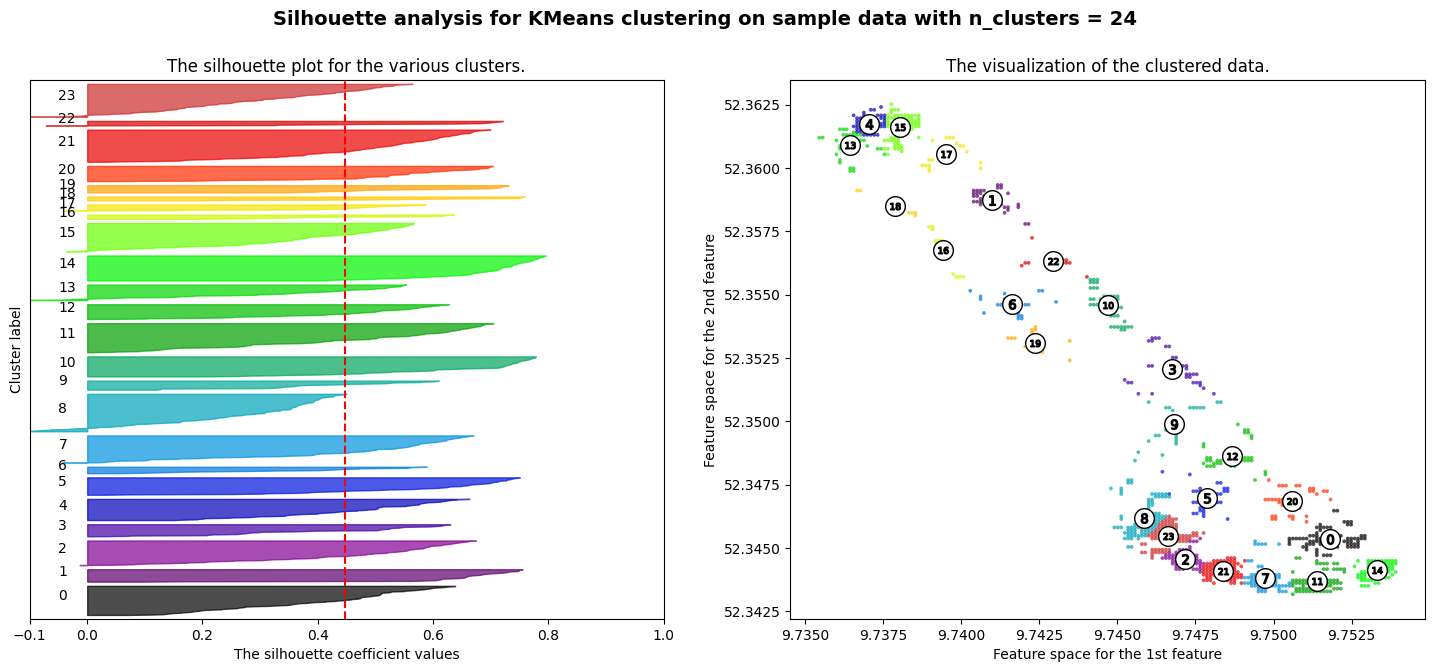

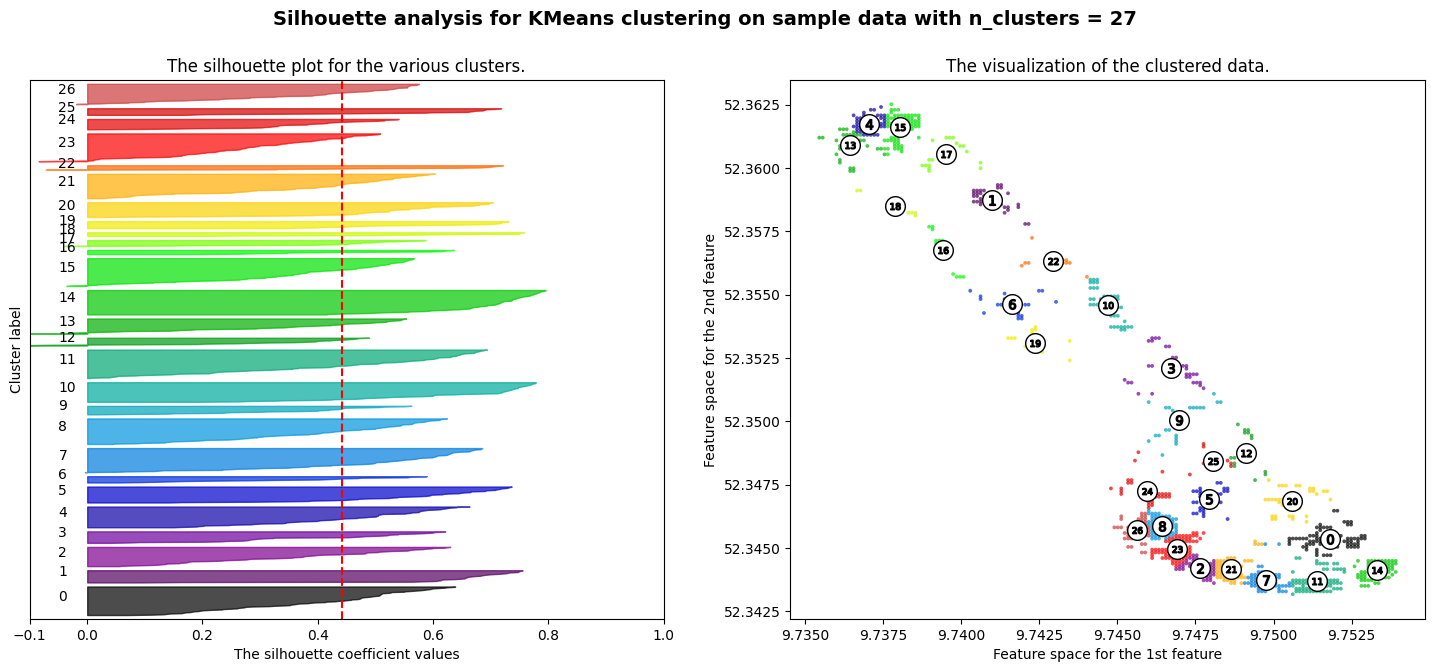

In [209]:
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = range(9, 30, 3)

for k in n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(positions) + (k + 1) * 10])

    km = KMeans(n_clusters=k, random_state=0).fit(positions)
    cluster_labels = km.fit_predict(positions)
    silhouette_avg = silhouette_score(positions, cluster_labels)
    sample_silhouette_values = silhouette_samples(positions, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / k)
    ax2.scatter(
        positions[:, 0], positions[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % k,
        fontsize=14,
        fontweight="bold",
    )

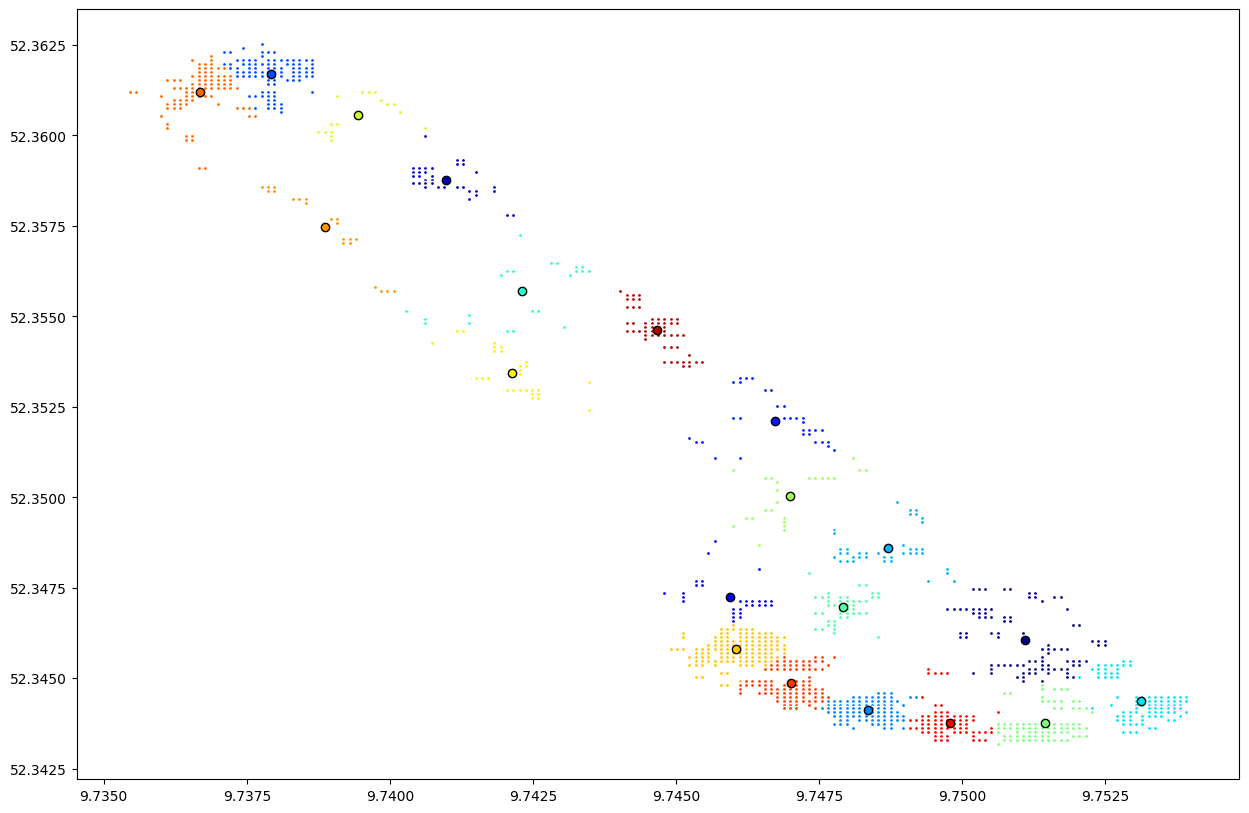

In [212]:
from sklearn.metrics.pairwise import pairwise_distances_argmin
import matplotlib

n_clusters = 20

norm = matplotlib.colors.Normalize(vmin=0, vmax=n_clusters)
colors = [plt.cm.jet(norm(i)) for i in range(n_clusters)]
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(positions)
k_means_cluster_centers = kmeans.cluster_centers_

k_means_labels = pairwise_distances_argmin(positions, k_means_cluster_centers)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(positions[my_members, 0], positions[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )

## Create Polygons out of the clustered regions


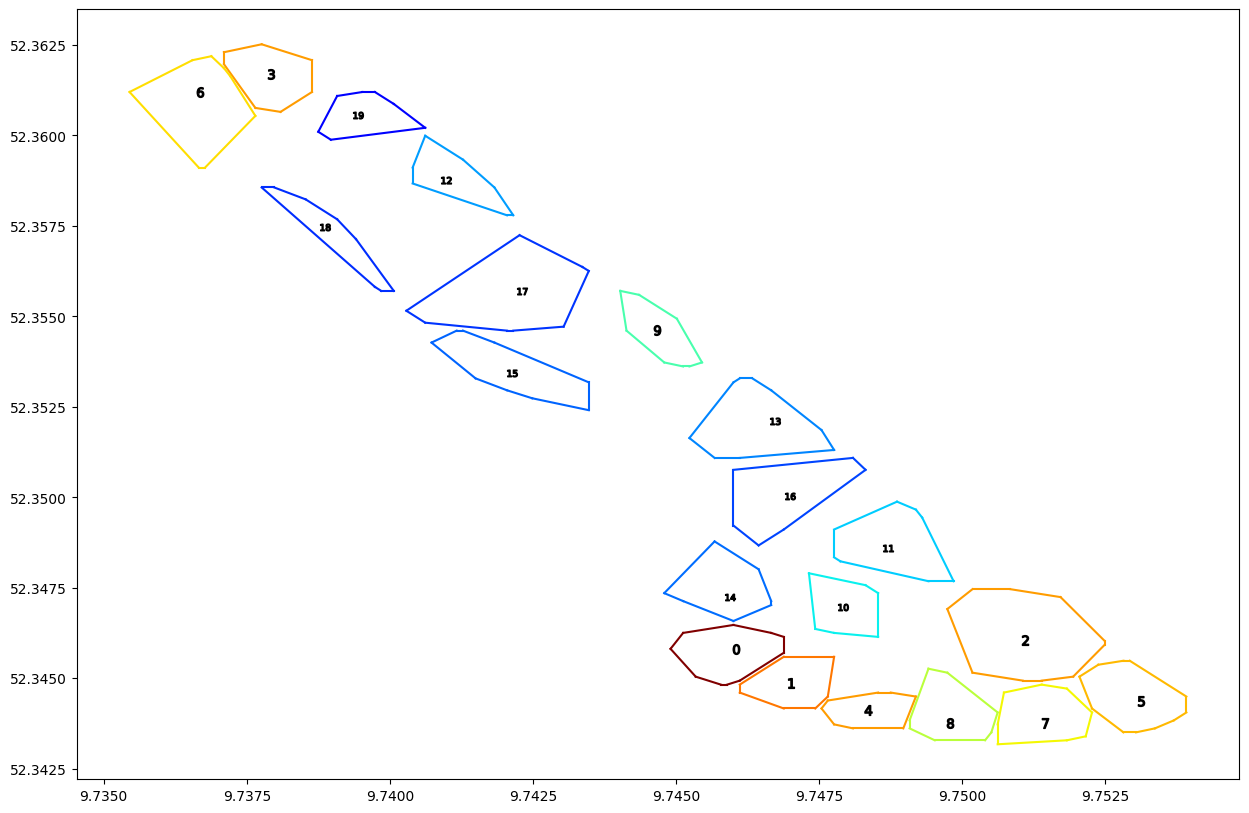

In [258]:
from scipy.spatial import ConvexHull

k_means_cluster_centers = kmeans.cluster_centers_
k_means_labels = pairwise_distances_argmin(positions, k_means_cluster_centers)

members_per_cluster = [positions[k_means_labels == k, :].shape[0] for k in range(n_clusters)]
norm = matplotlib.colors.Normalize(vmin=0, vmax=np.max(members_per_cluster))
colors = [plt.cm.jet(norm(members_per_cluster[k])) for k in range(n_clusters)]

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    member_positions = positions[my_members, :]
    n_member_positions = member_positions.shape[0]
    cluster_center = k_means_cluster_centers[k]
    hull = ConvexHull(member_positions)
    for simplex in hull.simplices:
        ax.plot(member_positions[simplex, 0], member_positions[simplex, 1], linestyle='-', color=col)

sorted_clusters = k_means_cluster_centers[np.argsort(members_per_cluster), :][::-1]
for i, c in enumerate(sorted_clusters):
    ax.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor='k')